## Chapter 2.1 Forward Gravity: Simple example

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

#%matplotlib widget


In [15]:
name='Greenstone'
path= '../data/gempy_models'

path = f'{path}/{name}'

surf_df =pn.read_csv(f'{path}/{name}_surfaces.csv', index_col=0,
                          dtype={'surface': 'str', 'series': 'category',
                                 'order_surfaces': 'int64', 'isBasement': 'bool', 'id': 'int64',
                                 'color': 'str'})

surf_df['series']

3    EarlyGranite_Series
0             BIF_Series
1             BIF_Series
2     SimpleMafic_Series
4               Basement
Name: series, dtype: category
Categories (4, object): [BIF_Series, Basement, EarlyGranite_Series, SimpleMafic_Series]

In [16]:
surf_df.sort_values(by='series')

,surface,series,order_surfaces,isBasement,color,vertices,edges,id,value_0
0,SimpleMafic2,BIF_Series,1,False,#015482,[[ 7.14955308e+05 6.88310000e+06 -2.04000000e...,[[ 2 1 0]\n [ 0 1 3]\n [ 4 ...,2,2.92
1,SimpleBIF,BIF_Series,2,False,#9f0052,NaN,NaN,3,3.10
4,basement,Basement,1,True,#443988,NaN,NaN,5,2.61
3,EarlyGranite,EarlyGranite_Series,1,False,#728f02,[[ 6.96000000e+05 6.86836000e+06 -7.26983536e...,[[ 2 1 0]\n [ 0 1 3]\n [ 4 ...,1,2.61
2,SimpleMafic1,SimpleMafic_Series,1,False,#ffbe00,NaN,NaN,4,2.92


In [14]:
c_ = surf_df.columns[~(surf_df.columns.isin(geo_model.surfaces._columns_vis_drop))]
geo_model.surfaces.df[c_] = surf_df[c_]
#geo_model.surfaces.sort_surfaces()
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id,value_0
0,SimpleMafic2,BIF_Series,1,False,#015482,2,2.92
1,SimpleBIF,BIF_Series,2,False,#9f0052,3,3.1
4,basement,Basement,1,True,#443988,5,2.61
3,EarlyGranite,EarlyGranite_Series,1,False,#728f02,1,2.61
2,SimpleMafic1,SimpleMafic_Series,1,False,#ffbe00,4,2.92


In [8]:
geo_model.surfaces.df['series']

0             BIF_Series
1             BIF_Series
4               Basement
3    EarlyGranite_Series
2     SimpleMafic_Series
Name: series, dtype: category
Categories (4, object): [BIF_Series, Basement, EarlyGranite_Series, SimpleMafic_Series]

In [2]:
geo_model = gp.load_model('Greenstone', path= '../data/gempy_models')

Active grids: ['regular']


In [10]:
geo_model.surfaces.sort_surfaces()

,surface,series,order_surfaces,isBasement,color,vertices,edges,id,value_0
0,SimpleMafic2,BIF_Series,1,False,#015482,NaN,NaN,1,2.92
1,SimpleBIF,BIF_Series,2,False,#9f0052,NaN,NaN,2,3.10
4,basement,Basement,1,False,#443988,NaN,NaN,3,2.61
3,EarlyGranite,EarlyGranite_Series,1,False,#728f02,NaN,NaN,4,2.61
2,SimpleMafic1,SimpleMafic_Series,1,True,#ffbe00,NaN,NaN,5,2.92


In [3]:
geo_model.series

,order_series,BottomRelation
EarlyGranite_Series,1,Erosion
BIF_Series,2,Erosion
SimpleMafic_Series,3,Erosion
Basement,4,Erosion


In [4]:
geo_model.series

,order_series,BottomRelation
EarlyGranite_Series,1,Erosion
BIF_Series,2,Erosion
SimpleMafic_Series,3,Erosion
Basement,4,Erosion


In [3]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id,value_0
0,SimpleMafic2,BIF_Series,1,False,#015482,1,2.92
1,SimpleBIF,BIF_Series,2,False,#9f0052,2,3.1
4,basement,Basement,1,False,#443988,3,2.61
3,EarlyGranite,EarlyGranite_Series,1,False,#728f02,4,2.61
2,SimpleMafic1,SimpleMafic_Series,1,True,#ffbe00,5,2.92


In [20]:
np.asarray(geo_model.series.df.index)


array(['EarlyGranite_Series', 'BIF_Series', 'SimpleMafic_Series',
       'Basement'], dtype=object)

In [21]:
geo_model.surfaces.df['series'].cat.reorder_categories(np.asarray(geo_model.series.df.index),
                                                      ordered=True, inplace=True)

In [23]:
geo_model.surfaces.sort_surfaces()

,surface,series,order_surfaces,isBasement,color,vertices,edges,id,value_0
3,EarlyGranite,EarlyGranite_Series,1,False,#728f02,NaN,NaN,1,2.61
0,SimpleMafic2,BIF_Series,1,False,#015482,NaN,NaN,2,2.92
1,SimpleBIF,BIF_Series,2,False,#9f0052,NaN,NaN,3,3.10
2,SimpleMafic1,SimpleMafic_Series,1,True,#ffbe00,NaN,NaN,4,2.92
4,basement,Basement,1,False,#443988,NaN,NaN,5,2.61


In [22]:
geo_model.surfaces.df['series']

0             BIF_Series
1             BIF_Series
4               Basement
3    EarlyGranite_Series
2     SimpleMafic_Series
Name: series, dtype: category
Categories (4, object): [EarlyGranite_Series < BIF_Series < SimpleMafic_Series < Basement]

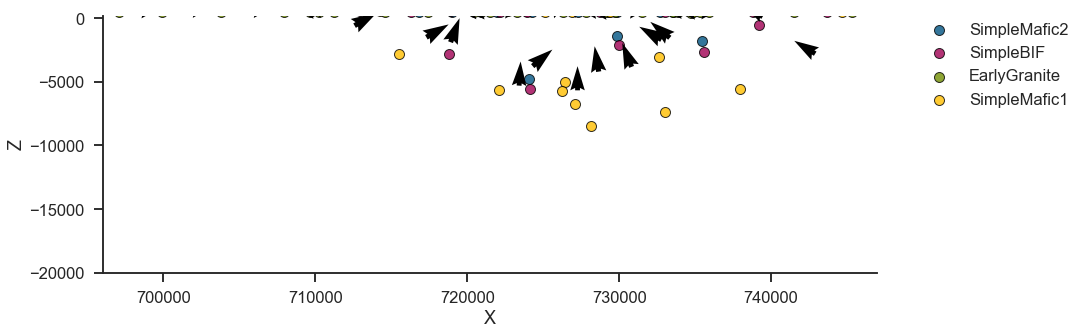

In [4]:
gp.plot.plot_data(geo_model)

In [5]:
# Compute normal model:
# gp.set_interpolation_data(geo_model,
#                           compile_theano=True,
#                           theano_optimizer='fast_compile',
#                           verbose=[])
# gp.compute_model(geo_model)

### Creating grid

First we need to define the location of the devices. For this example we can make a map:

In [6]:
grav_res = 20
X = np.linspace(7.050000e+05, 747000, grav_res)
Y = np.linspace(6863000, 6925000, grav_res)
Z= 300
xyz= np.meshgrid(X, Y, Z)
xy_ravel = np.vstack(list(map(np.ravel, xyz))).T
xy_ravel

array([[7.05000000e+05, 6.86300000e+06, 3.00000000e+02],
       [7.07210526e+05, 6.86300000e+06, 3.00000000e+02],
       [7.09421053e+05, 6.86300000e+06, 3.00000000e+02],
       ...,
       [7.42578947e+05, 6.92500000e+06, 3.00000000e+02],
       [7.44789474e+05, 6.92500000e+06, 3.00000000e+02],
       [7.47000000e+05, 6.92500000e+06, 3.00000000e+02]])

We can see the location of the devices relative to the model data:

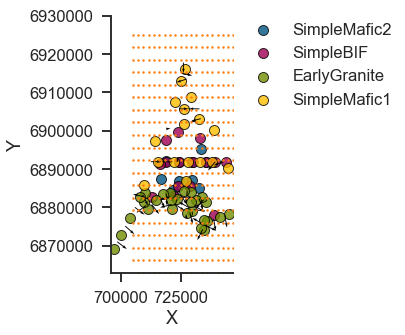

In [7]:
import matplotlib.pyplot as plt
gp.plot.plot_data(geo_model, direction='z')
plt.scatter(xy_ravel[:,0], xy_ravel[:, 1], s=1)

Now we need to create the grid centered on the devices (see: https://github.com/cgre-aachen/gempy/blob/master/notebooks/tutorials/ch1-3-Grids.ipynb)

In [8]:
geo_model.set_centered_grid(xy_ravel,  resolution = [10, 10, 15], radio=5000)

Active grids: ['regular' 'centered']


Grid Object. Values: 
array([[ 6.96510000e+05,  6.86367000e+06, -1.97980000e+04],
       [ 6.96510000e+05,  6.86367000e+06, -1.93940000e+04],
       [ 6.96510000e+05,  6.86367000e+06, -1.89900000e+04],
       ...,
       [ 7.52000000e+05,  6.93000000e+06, -3.10768481e+03],
       [ 7.52000000e+05,  6.93000000e+06, -4.31811404e+03],
       [ 7.52000000e+05,  6.93000000e+06, -6.00000000e+03]])

In [9]:
geo_model.grid.centered_grid.kernel_centers

array([[-5000.        , -5000.        ,  -300.        ],
       [-5000.        , -5000.        ,  -360.        ],
       [-5000.        , -5000.        ,  -383.36972966],
       ...,
       [ 5000.        ,  5000.        , -3407.68480754],
       [ 5000.        ,  5000.        , -4618.11403801],
       [ 5000.        ,  5000.        , -6300.        ]])

Now we need to compute the component tz (see https://github.com/cgre-achen/gempy/blob/master/notebooks/tutorials/ch2-2-Cell_selection.ipynb)

In [10]:
from gempy.assets.geophysics import GeophysicsPreprocessing

In [11]:
g = GeophysicsPreprocessing(geo_model.grid.centered_grid)

In [12]:
tz = g.set_tz_kernel()

### Compiling the gravity graph

If geo_model has already a centered grid, the calculation of tz happens automatically. Alternatively you pass tz to `set_gravity interpolator`. This theano graph will return gravity instead the lithologies. In addition we need either to pass the density block (see below). Or the position of density on the surface(in the future the name) to compute the density block at running time.

In [13]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id,value_0
0,SimpleMafic2,BIF_Series,1,False,#015482,1,2.92
1,SimpleBIF,BIF_Series,2,False,#9f0052,2,3.1
4,basement,Basement,1,False,#443988,3,2.61
3,EarlyGranite,EarlyGranite_Series,1,False,#728f02,4,2.61
2,SimpleMafic1,SimpleMafic_Series,1,True,#ffbe00,5,2.92


In this case the densities of each layer are at the loc 1 (0 is the id)

In [14]:
geo_model.set_gravity_interpolator(pos_density=1, verbose=['grid_shape', 'slices'])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,"[grid_shape, slices]"


Once we have created a gravity interpolator we can call it from compute model as follows:

In [15]:
grav = gp.compute_model(geo_model, output='gravity')

Active grids: ['centered']
grid_shape __str__ = [774532]
slices __str__ = [     0  12066  24132  36198  48264  60330  72396  84462  96528 108594
 120660 132726 144792 156858 168924 180990 193056 205122 217188 229254
 241320 253386 265452 277518 289584 301650 313716 325782 337848 349914
 361980 374046 386112 398178 410244 422310 434376 446442 458508 470574
 482640 494706 506772 518838 530904 542970 555036 567102 579168 591234
 603300 615366 627432 639498 651564 663630 675696 687762 699828 711894
 723960 736026 748092 760158 772224 774532]
grid_shape __str__ = [774532]
slices __str__ = [     0  39124  78248 117372 156496 195620 234744 273868 312992 352116
 391240 430364 469488 508612 547736 586860 625984 665108 704232 743356
 774532]
grid_shape __str__ = [774532]
slices __str__ = [     0  22260  44520  66780  89040 111300 133560 155820 178080 200340
 222600 244860 267120 289380 311640 333900 356160 378420 400680 422940
 445200 467460 489720 511980 534240 556500 578760 601020 623280 64554

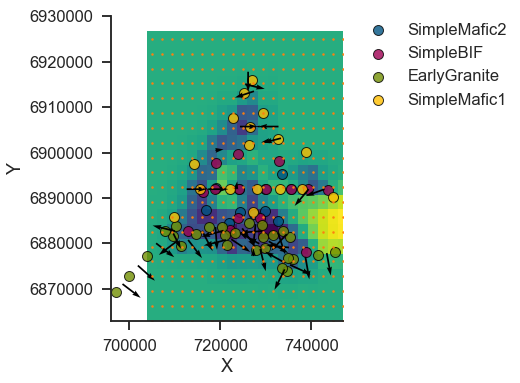

In [16]:
gp.plot.plot_data(geo_model, direction='z', height=7)
plt.scatter(xy_ravel[:,0], xy_ravel[:, 1], s=1)
plt.imshow(grav.reshape(grav_res, grav_res), extent = (xy_ravel[:,0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0])/2,
                                                       xy_ravel[:,0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0])/2,
                                                       xy_ravel[:,1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1])/2,
                                                       xy_ravel[:,1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1])/2),
           cmap='viridis_r', origin='bottom')

#### Plotting lithologies

If we want to compute the lithologies we will need to create a normal interpolator object as seen in the Chapter 1 of the tutorials  

In [17]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_run',
                          verbose=[])

Compiling theano function...
Compilation Done!


Now we want to interpolate on a regular grid for a simple plot. Therefore we need to activate the regular grid:

In [18]:
geo_model.set_active_grid('regular')

Active grids: ['regular']


Grid Object. Values: 
array([[ 6.96510e+05,  6.86367e+06, -1.97980e+04],
       [ 6.96510e+05,  6.86367e+06, -1.93940e+04],
       [ 6.96510e+05,  6.86367e+06, -1.89900e+04],
       ...,
       [ 7.46490e+05,  6.92933e+06, -8.10000e+02],
       [ 7.46490e+05,  6.92933e+06, -4.06000e+02],
       [ 7.46490e+05,  6.92933e+06, -2.00000e+00]])

In [19]:
gp.compute_model(geo_model)


Lithology ids 
  [5. 5. 5. ... 1. 1. 1.] 

Now we can plot all together (change the alpha parameter to see the gravity overlying):

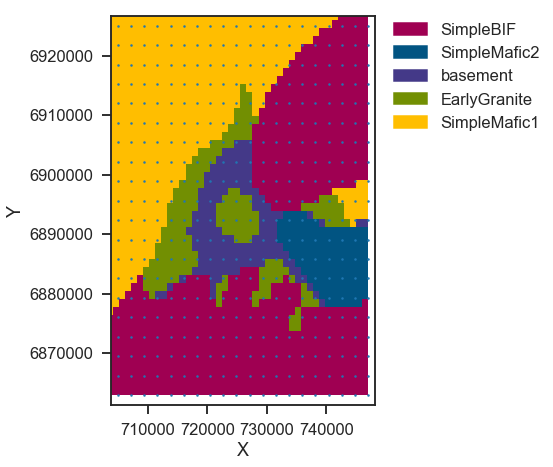

In [28]:
gp.plot.plot_section(geo_model, -1, direction='z')
plt.scatter(xy_ravel[:,0], xy_ravel[:, 1], s=1)
plt.imshow(grav.reshape(grav_res, grav_res), extent = (xy_ravel[:,0].min() + (xy_ravel[0, 0] - xy_ravel[1, 0])/2,
                                                       xy_ravel[:,0].max() - (xy_ravel[0, 0] - xy_ravel[1, 0])/2,
                                                       xy_ravel[:,1].min() + (xy_ravel[0, 1] - xy_ravel[30, 1])/2,
                                                       xy_ravel[:,1].max() - (xy_ravel[0, 1] - xy_ravel[30, 1])/2),
           cmap='viridis_r', origin='bottom', alpha=.0)

### Computing gravity by passing the density block.

We may have computed the densities on a previous step and we want to compute gravity afterwards. First lets compute the density block on a centered grid:

In [21]:
geo_model.set_active_grid('centered')

Active grids: ['centered']


Grid Object. Values: 
array([[ 7.00000000e+05,  6.85800000e+06,  0.00000000e+00],
       [ 7.00000000e+05,  6.85800000e+06, -6.00000000e+01],
       [ 7.00000000e+05,  6.85800000e+06, -8.33697297e+01],
       ...,
       [ 7.52000000e+05,  6.93000000e+06, -3.10768481e+03],
       [ 7.52000000e+05,  6.93000000e+06, -4.31811404e+03],
       [ 7.52000000e+05,  6.93000000e+06, -6.00000000e+03]])

In [22]:
geo_model.grid.length

array([     0,      0,      0,      0,      0, 774400])

In [23]:
sol = gp.compute_model(geo_model, set_solutions=False)

In [24]:
l0, l1 = geo_model.grid.get_grid_args('centered')
sol[0][1][l0:l1]

array([3.0999999, 3.0999999, 3.0999999, ..., 3.0999999, 3.0999999,
       3.0999999])

Notice that since the heavy computations have been already carried on the compilation of the graph and the evaluation of the gravity is rather fast!

In [25]:
geo_model.set_gravity_interpolator(density_block=sol[0][1][l0:l1])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_run
device,cpu
verbosity,[]


In [26]:
grav_shared = gp.compute_model(geo_model, output='gravity')

Active grids: ['centered']


In [27]:
# We check that the results are the same as we got before:
(grav != grav_shared).sum()

400